In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_wind_combined = pd.read_csv('wind_data_combined.csv')
df_wind_combined.head()

timestamp  temp_2m_south  wind_u_south  wind_v_south  \
0  2021-01-01 01:00:00          44.45      8.833785     -4.142875   
1  2021-01-01 02:00:00          43.45      8.720156     -3.938205   
2  2021-01-01 03:00:00          41.90      8.357309     -3.723078   
3  2021-01-01 04:00:00          41.48      8.048112     -3.574828   
4  2021-01-01 05:00:00          40.61      7.704257     -3.411989   

   temp_2m_north  wind_u_north  wind_v_north  temp_2m_east  wind_u_east  \
0          36.22     -0.381892     -7.454720         51.64     9.073054   
1          36.13      0.146601     -6.802784         49.33     8.665540   
2          35.77      0.887693     -6.319172         46.58     7.918151   
3          35.56      1.753668     -5.496035         46.07     8.195437   
4          35.70      2.519655     -4.641656         45.62     8.760590   

   wind_v_east  ...  northcentral_load  south_load  southcentral_load  \
0     5.087430  ...           13340.34     3586.55            7693.74   
1     4.598661  ...           13311.63     3586.12            7566.95   
2     4.829106  ...           13356.44     3570.59            7506.69   
3     5.092289  ...           13528.65     3590.90            7563.97   
4     4.992007  ...           13856.24     3647.15            7716.80   

   west_load  system_load  wind_system  wind_coast  wind_south  wind_west  \
0    1421.39     43321.05     14012.32     1975.35     1246.65    7623.01   
1    1405.54     43063.07     14315.26     2023.05      980.89    7778.31   
2    1402.28     43090.06     14247.88     1819.02      742.39    8068.91   
3    1405.09     43486.59     13273.42     1426.17      750.18    7543.59   
4    1411.72     44265.32     12248.01     1280.43      825.16    6667.16   

   wind_north  
0      146.97  
1      174.87  
2      211.95  
3      186.87  
4      169.53  

[5 rows x 27 columns]

In [ ]:
# clean further by combining wind vectors to get total wind speed

df_wind_combined['total_wind_speed_south'] = np.sqrt(df_wind_combined['wind_u_south']**2 + df_wind_combined['wind_v_south']**2)
df_wind_combined['total_wind_speed_north'] = np.sqrt(df_wind_combined['wind_u_north']**2 + df_wind_combined['wind_v_north']**2)
df_wind_combined['total_wind_speed_east']  = np.sqrt(df_wind_combined['wind_u_east']**2  + df_wind_combined['wind_v_east']**2)
df_wind_combined['total_wind_speed_west']  = np.sqrt(df_wind_combined['wind_u_west']**2  + df_wind_combined['wind_v_west']**2)

# show the newly created columns
df_wind_combined[['total_wind_speed_south', 'total_wind_speed_north', 'total_wind_speed_east', 'total_wind_speed_west']].head()

total_wind_speed_south  total_wind_speed_north  total_wind_speed_east  \
0                9.757006                7.464495              10.402031   
1                9.568207                6.804363               9.810161   
2                9.149094                6.381217               9.274556   
3                8.806333                5.769034               9.648658   
4                8.425986                5.281442              10.083059   

   total_wind_speed_west  
0               4.923597  
1               4.874773  
2               4.925329  
3               4.906272  
4               5.086493

In [ ]:
# new cols
df_wind_combined = df_wind_combined[["timestamp", "temp_2m_south", "total_wind_speed_south", "wind_south",
                                    "temp_2m_north", "total_wind_speed_north",'wind_north', "temp_2m_east", "total_wind_speed_east",'wind_coast',
                                    "temp_2m_west","total_wind_speed_west",'wind_west','wind_system']]

df_wind_combined

timestamp  temp_2m_south  total_wind_speed_south  wind_south  \
0      2021-01-01 01:00:00          44.45                9.757006     1246.65   
1      2021-01-01 02:00:00          43.45                9.568207      980.89   
2      2021-01-01 03:00:00          41.90                9.149094      742.39   
3      2021-01-01 04:00:00          41.48                8.806333      750.18   
4      2021-01-01 05:00:00          40.61                8.425986      825.16   
...                    ...            ...                     ...         ...   
25461  2023-12-31 19:00:00          70.61                5.688462      819.51   
25462  2023-12-31 20:00:00          72.74                5.829559     1038.65   
25463  2023-12-31 21:00:00          73.42                5.749230     1519.15   
25464  2023-12-31 22:00:00          72.40                5.027327     1721.96   
25465  2023-12-31 23:00:00          71.68                4.854172     1535.46   

       temp_2m_north  total_wind_speed_north  wind_north  temp_2m_east  \
0              36.22                7.464495      146.97         51.64   
1              36.13                6.804363      174.87         49.33   
2              35.77                6.381217      211.95         46.58   
3              35.56                5.769034      186.87         46.07   
4              35.70                5.281442      169.53         45.62   
...              ...                     ...         ...           ...   
25461          60.31                0.583563      561.02         69.16   
25462          62.22                0.445353      782.17         69.94   
25463          63.34                0.860620     1112.40         70.00   
25464          60.22                2.058104     1541.90         68.20   
25465          58.87                3.285367     1872.57         66.64   

       total_wind_speed_east  wind_coast  temp_2m_west  total_wind_speed_west  \
0                  10.402031     1975.35         34.58               4.923597   
1                   9.810161     2023.05         33.28               4.874773   
2                   9.274556     1819.02         32.12               4.925329   
3                   9.648658     1426.17         31.56               4.906272   
4                  10.083059     1280.43         30.56               5.086493   
...                      ...         ...           ...                    ...   
25461               4.067824     3073.89         60.76               1.583523   
25462               4.358595     2917.42         64.64               2.005270   
25463               4.574786     2761.19         65.52               2.263775   
25464               4.108896     2506.83         62.85               1.666738   
25465               4.692972     2375.94         62.54               1.224687   

       wind_west  wind_system  
0        7623.01     14012.32  
1        7778.31     14315.26  
2        8068.91     14247.88  
3        7543.59     13273.42  
4        6667.16     12248.01  
...          ...          ...  
25461    8655.73     14308.86  
25462   11066.57     17164.47  
25463   11578.04     18302.32  
25464   11669.37     18606.89  
25465   11163.64     17863.04  

[25466 rows x 14 columns]

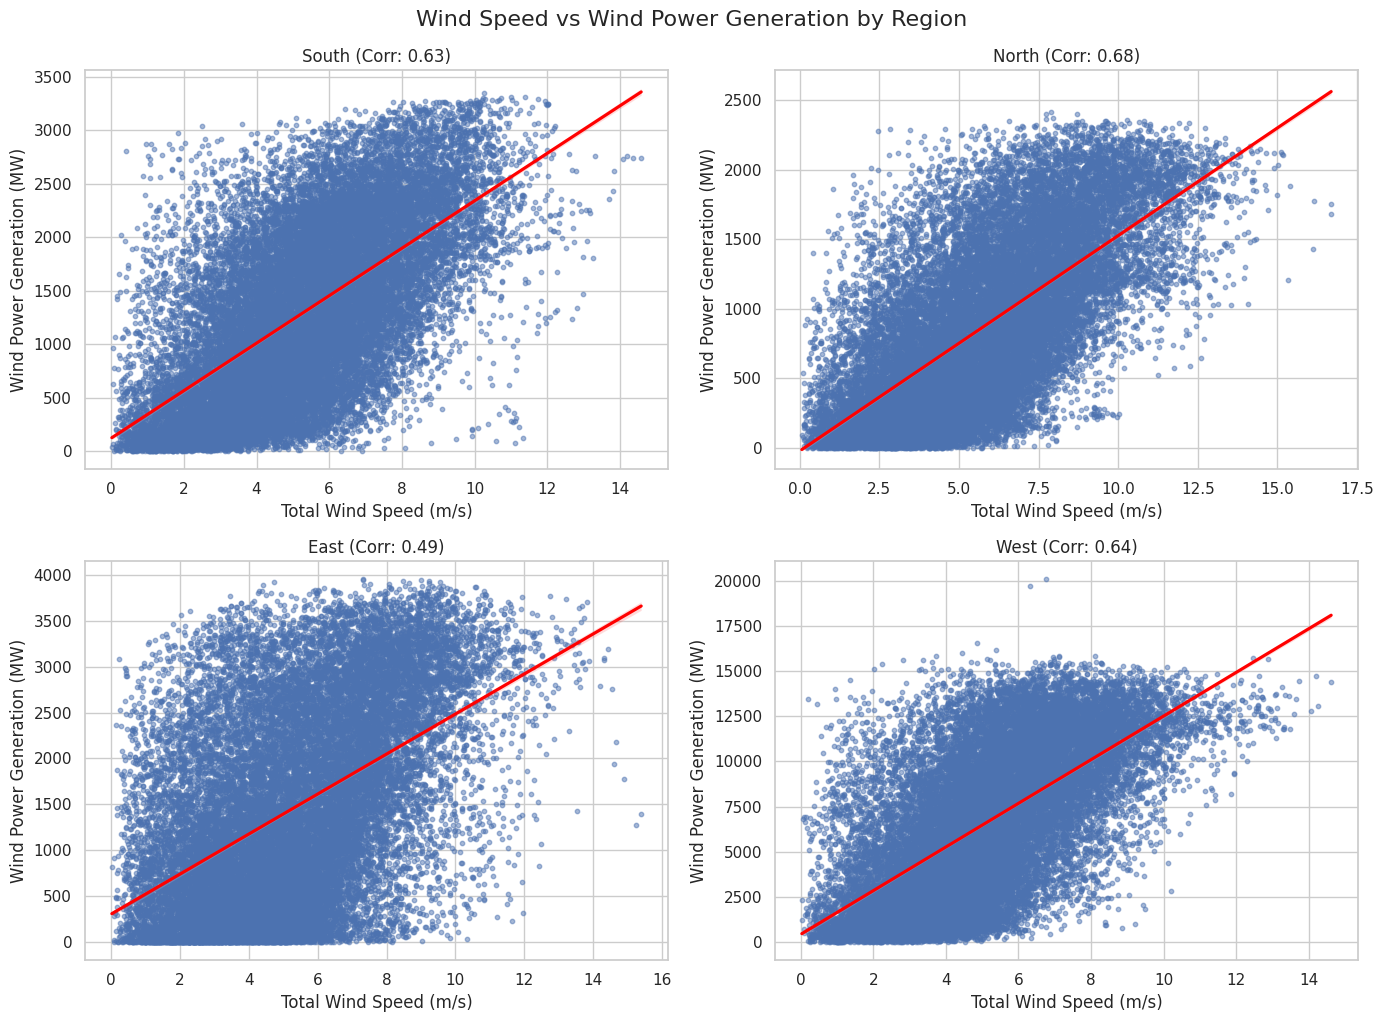


Correlation between wind speed and wind power generation by region:
South: 0.629
North: 0.683
East: 0.495
West: 0.639


In [ ]:
# Convert timestamp to datetime
df_wind_combined['timestamp'] = pd.to_datetime(df_wind_combined['timestamp'])

# Define regions and mapping for column names
regions = ['south', 'north', 'east', 'west']
region_map = {'east': 'coast'}  # override for east region

correlations = {}

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(14, 10))

# Loop through each region and plot
for i, region in enumerate(regions, 1):
    # Use custom mapping if applicable
    actual_region = region_map.get(region, region)

    speed_col = f'total_wind_speed_{region}'  # wind speed uses geographic direction
    power_col = f'wind_{actual_region}'       # power col may use 'coast' instead of 'east'

    # Calculate Pearson correlation
    corr = df_wind_combined[speed_col].corr(df_wind_combined[power_col])
    correlations[region] = corr

    # Plot scatter with regression line
    plt.subplot(2, 2, i)
    sns.regplot(
        x=df_wind_combined[speed_col],
        y=df_wind_combined[power_col],
        scatter_kws={'s': 10, 'alpha': 0.5},
        line_kws={'color': 'red'}
    )
    plt.title(f'{region.capitalize()} (Corr: {corr:.2f})')
    plt.xlabel('Total Wind Speed (m/s)')
    plt.ylabel('Wind Power Generation (MW)')

plt.tight_layout()
plt.suptitle('Wind Speed vs Wind Power Generation by Region', fontsize=16, y=1.02)
plt.show()

# Print correlation results
print("\nCorrelation between wind speed and wind power generation by region:")
for region, corr in correlations.items():
    print(f"{region.capitalize()}: {corr:.3f}")


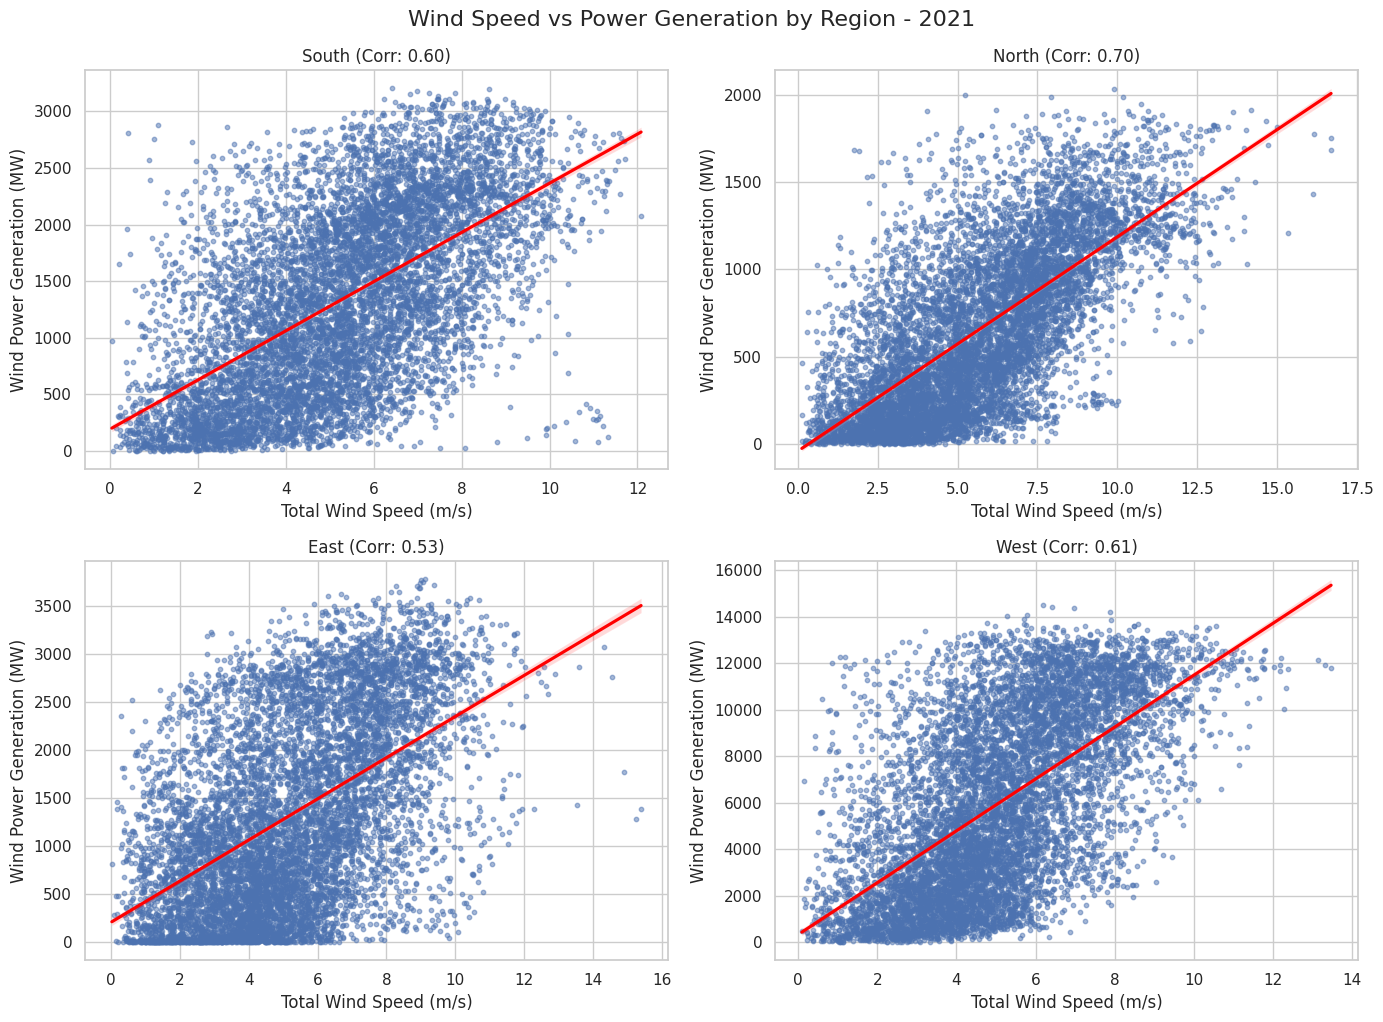


Correlations for 2021:
South: 0.599
North: 0.698
East: 0.526
West: 0.612


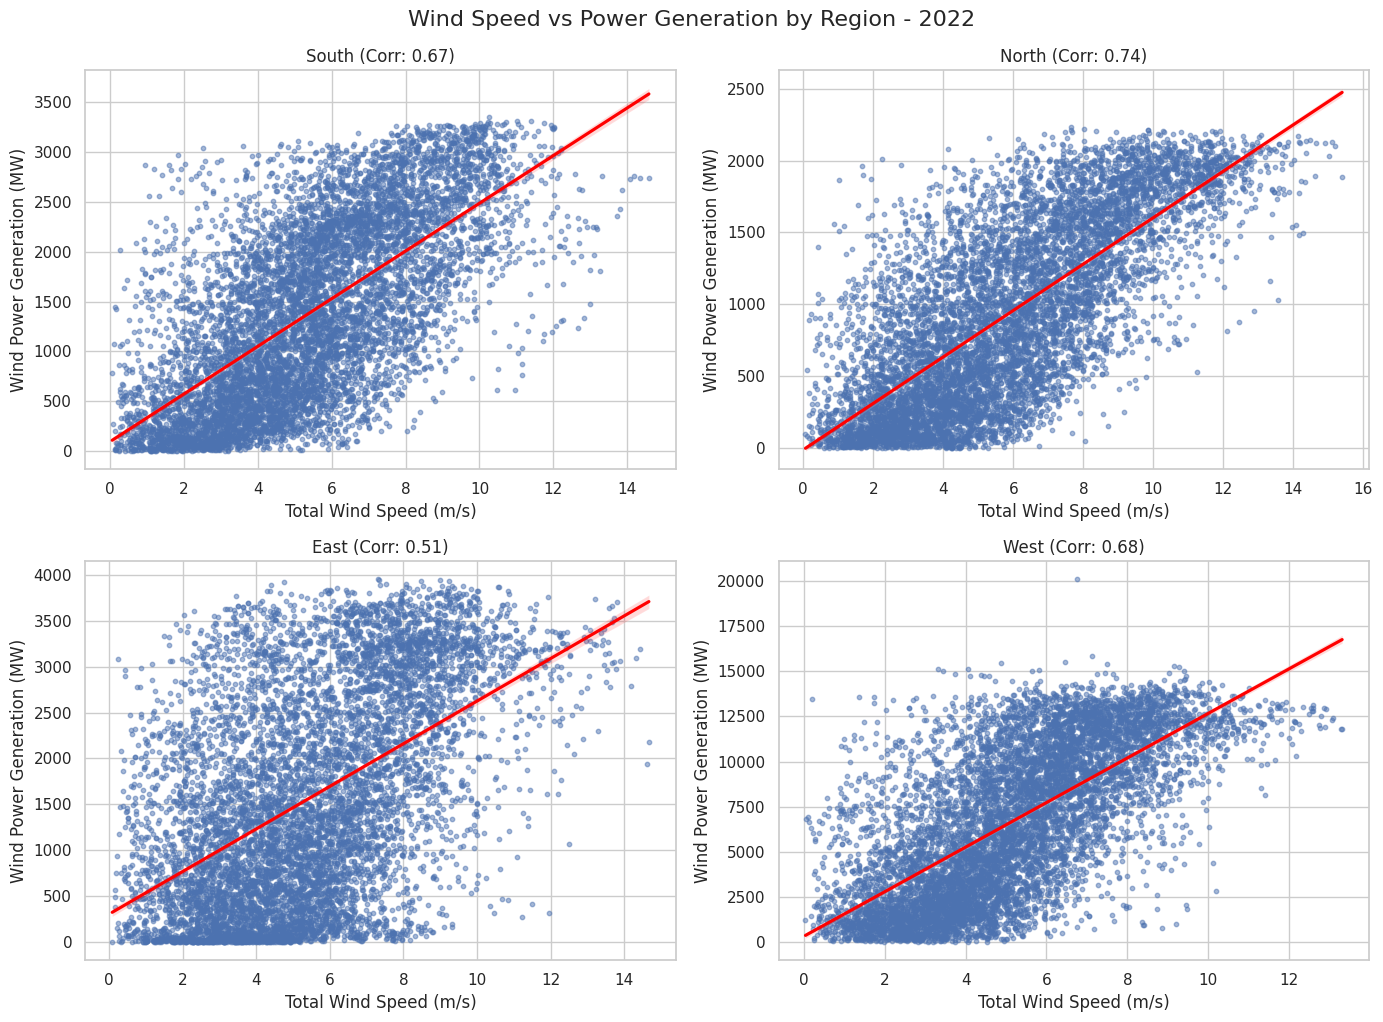


Correlations for 2022:
South: 0.669
North: 0.740
East: 0.512
West: 0.682


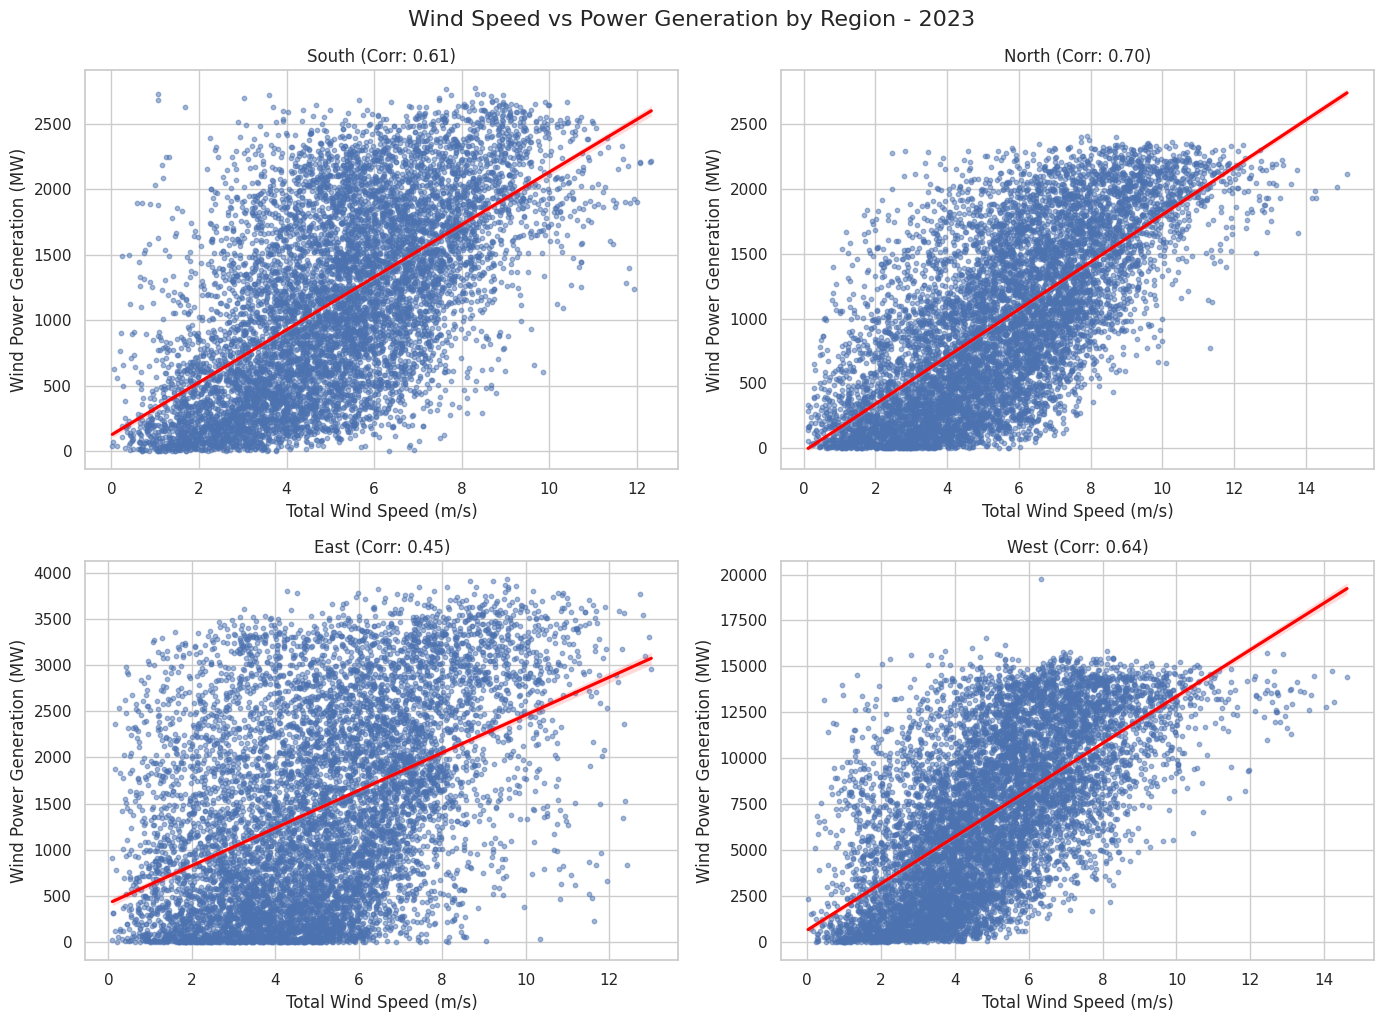


Correlations for 2023:
South: 0.612
North: 0.697
East: 0.448
West: 0.635


In [ ]:
# 1. Create 'year' column from timestamp
df_wind_combined['year'] = df_wind_combined['timestamp'].dt.year

# 2. Set up regions and mapping for column names
regions = ['south', 'north', 'east', 'west']
region_map = {'east': 'coast'}  # 'east' is represented by 'coast' in wind power column

# 3. Get unique years in the data
years = sorted(df_wind_combined['year'].unique())

# 4. Create plots and compute correlations for each year
for year in years:
    df_year = df_wind_combined[df_wind_combined['year'] == year]
    correlations = {}

    sns.set(style='whitegrid')
    plt.figure(figsize=(14, 10))

    for i, region in enumerate(regions, 1):
        actual_region = region_map.get(region, region)

        speed_col = f'total_wind_speed_{region}'
        power_col = f'wind_{actual_region}'

        # Calculate correlation for the year
        corr = df_year[speed_col].corr(df_year[power_col])
        correlations[region] = corr

        # Plot
        plt.subplot(2, 2, i)
        sns.regplot(
            x=df_year[speed_col],
            y=df_year[power_col],
            scatter_kws={'s': 10, 'alpha': 0.5},
            line_kws={'color': 'red'}
        )
        plt.title(f'{region.capitalize()} (Corr: {corr:.2f})')
        plt.xlabel('Total Wind Speed (m/s)')
        plt.ylabel('Wind Power Generation (MW)')

    plt.tight_layout()
    plt.suptitle(f'Wind Speed vs Power Generation by Region - {year}', fontsize=16, y=1.02)
    plt.show()

    # Print correlation summary for the year
    print(f"\nCorrelations for {year}:")
    for region, corr in correlations.items():
        print(f"{region.capitalize()}: {corr:.3f}")


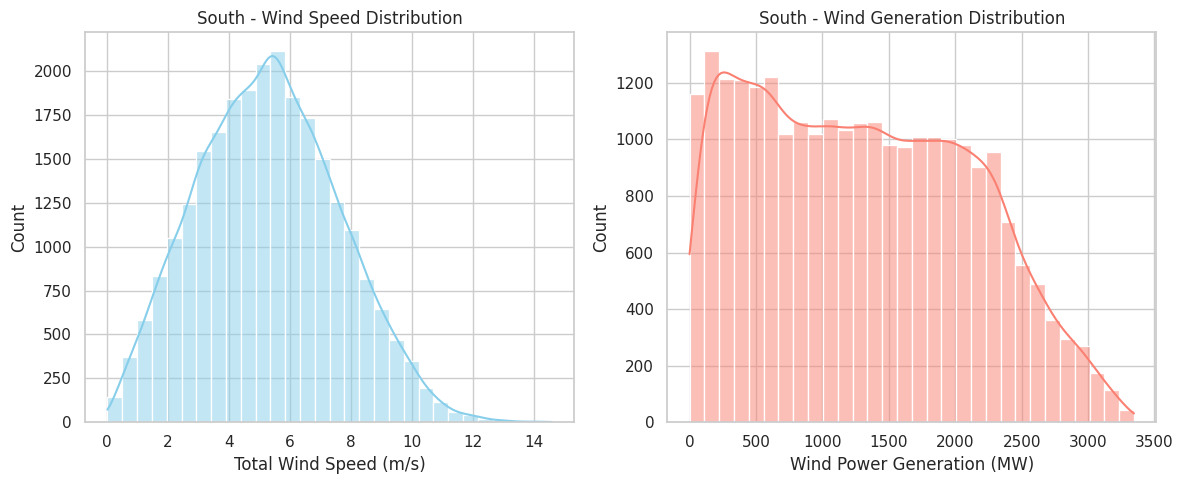

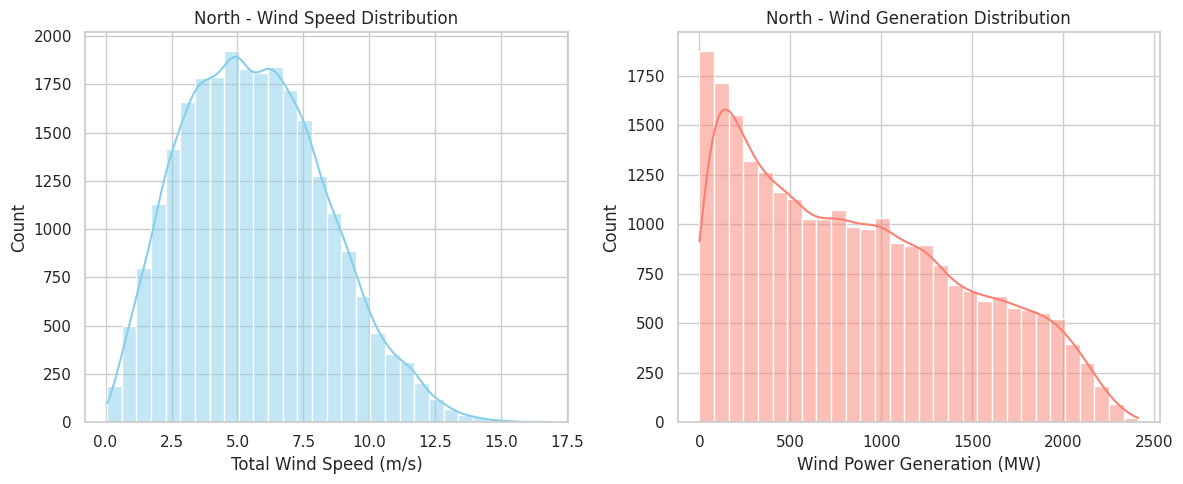

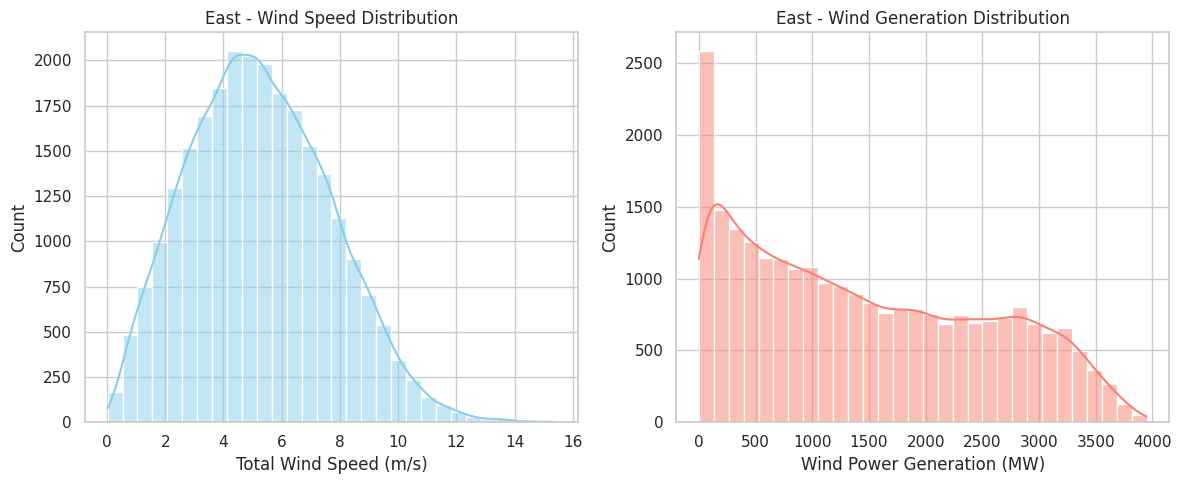

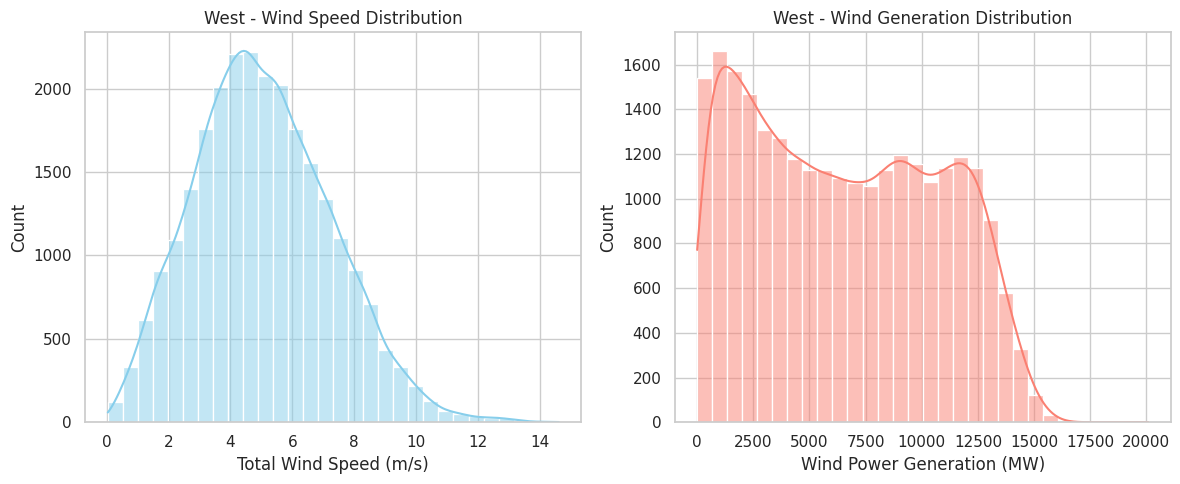

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

regions = ['south', 'north', 'east', 'west']
region_map = {'east': 'coast'}

# Plot histograms for wind speed and wind generation
for region in regions:
    actual_region = region_map.get(region, region)
    speed_col = f'total_wind_speed_{region}'
    power_col = f'wind_{actual_region}'

    plt.figure(figsize=(12, 5))

    # Wind speed distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df_wind_combined[speed_col], kde=True, bins=30, color='skyblue')
    plt.title(f'{region.capitalize()} - Wind Speed Distribution')
    plt.xlabel('Total Wind Speed (m/s)')

    # Wind generation distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_wind_combined[power_col], kde=True, bins=30, color='salmon')
    plt.title(f'{region.capitalize()} - Wind Generation Distribution')
    plt.xlabel('Wind Power Generation (MW)')

    plt.tight_layout()
    plt.show()


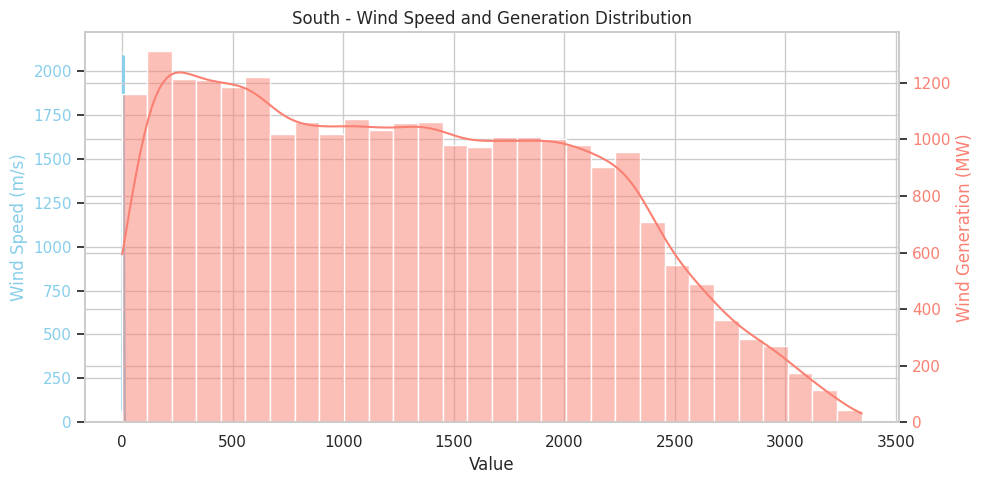

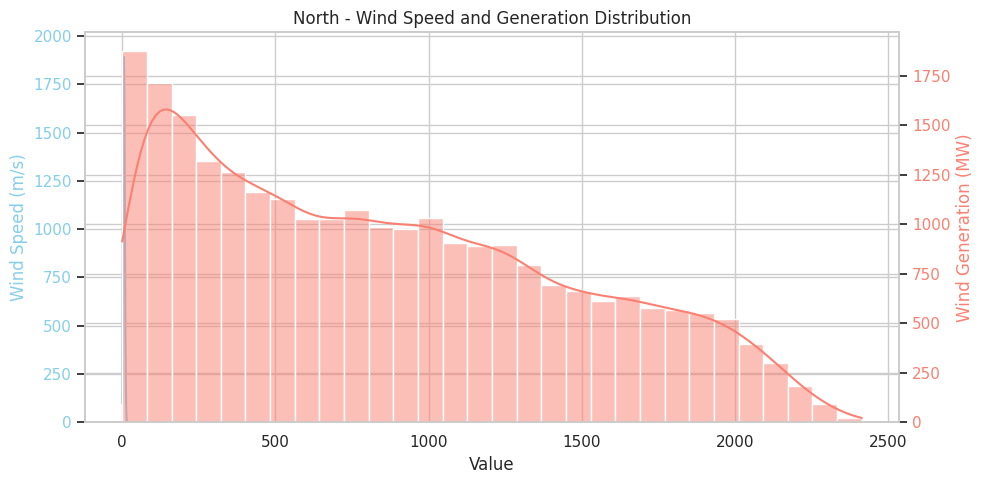

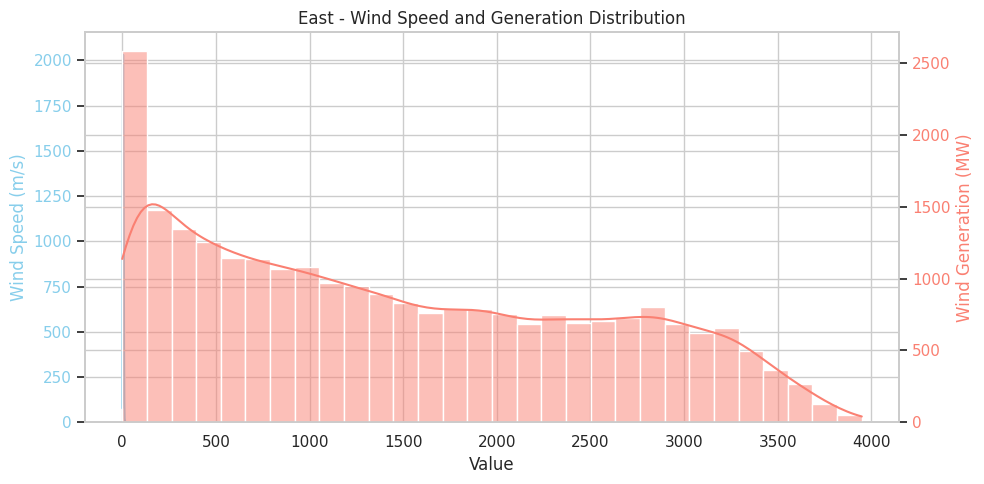

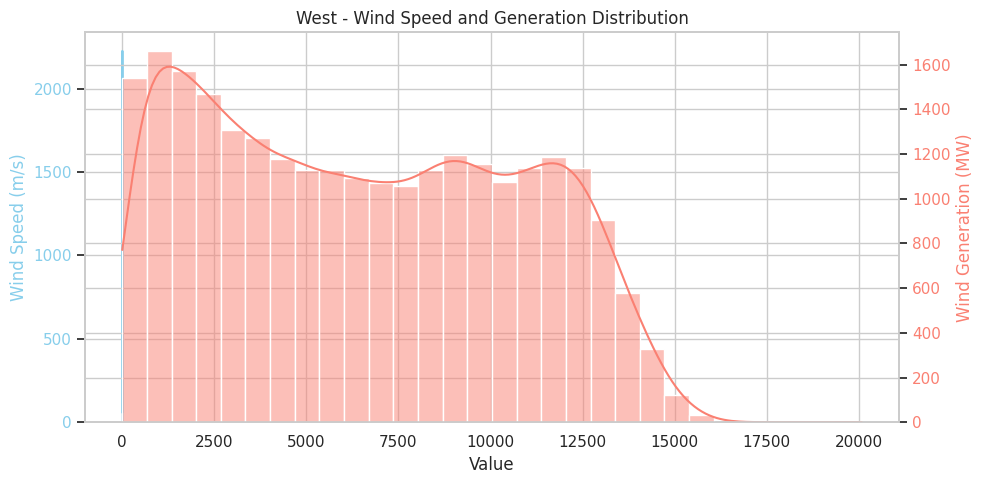

In [ ]:
import matplotlib.pyplot as plt

regions = ['south', 'north', 'east', 'west']
region_map = {'east': 'coast'}

for region in regions:
    actual_region = region_map.get(region, region)
    speed_col = f'total_wind_speed_{region}'
    power_col = f'wind_{actual_region}'

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot wind speed histogram
    sns.histplot(df_wind_combined[speed_col], bins=30, kde=True, color='skyblue', ax=ax1, label='Wind Speed')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Wind Speed (m/s)', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    # Create a second y-axis
    ax2 = ax1.twinx()
    sns.histplot(df_wind_combined[power_col], bins=30, kde=True, color='salmon', ax=ax2, label='Wind Generation')
    ax2.set_ylabel('Wind Generation (MW)', color='salmon')
    ax2.tick_params(axis='y', labelcolor='salmon')

    plt.title(f'{region.capitalize()} - Wind Speed and Generation Distribution')
    fig.tight_layout()
    plt.show()


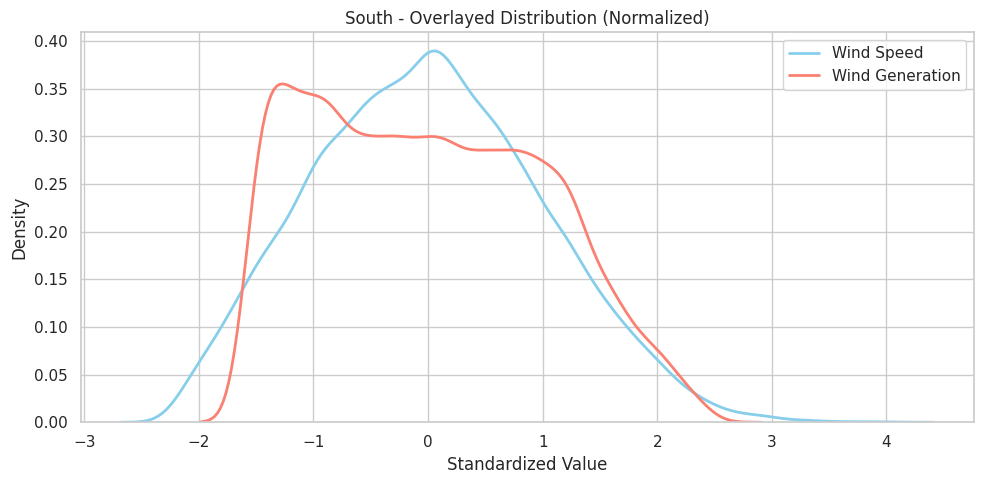

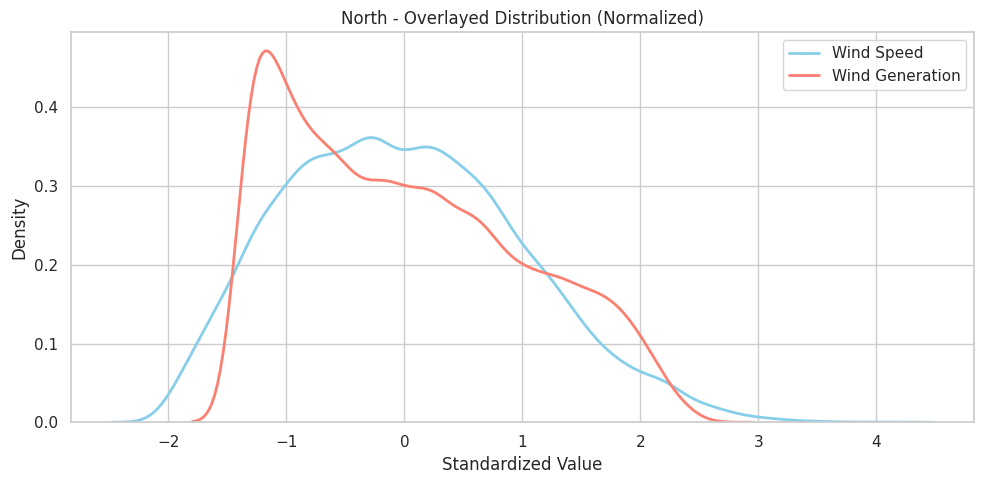

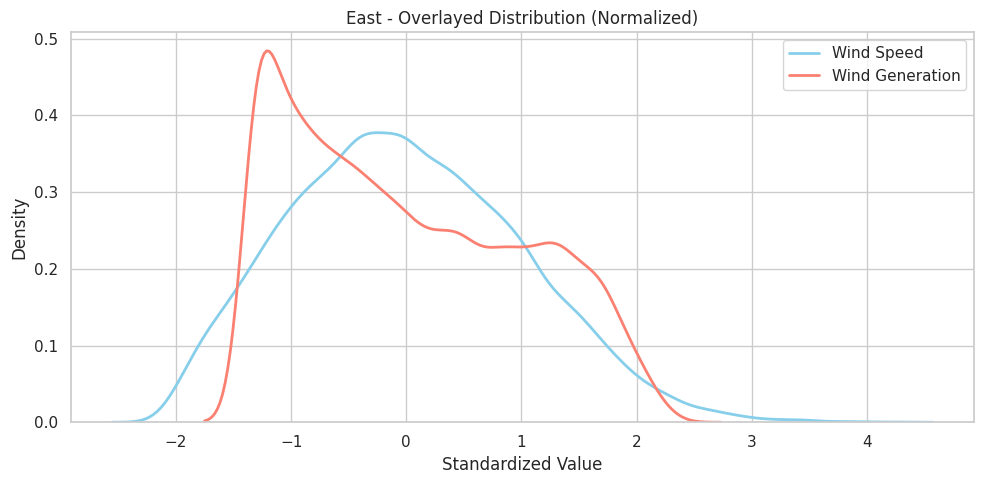

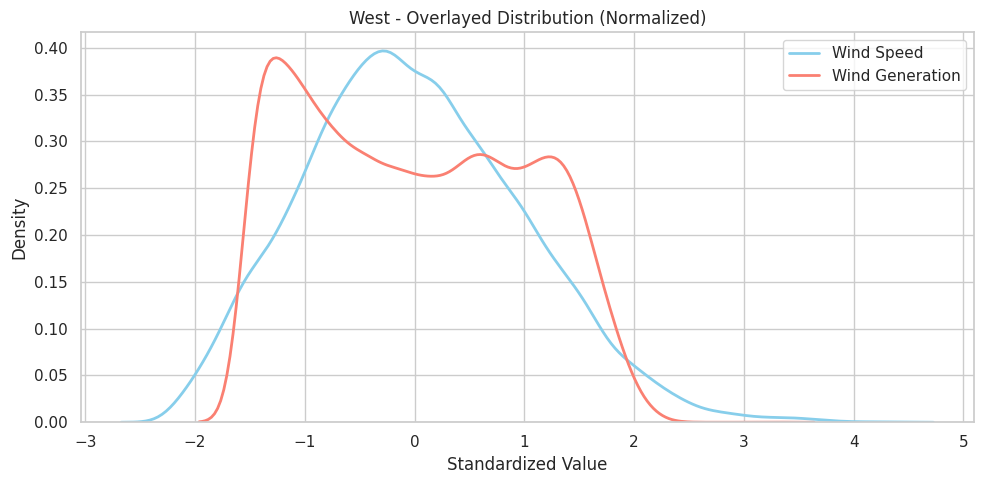

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

regions = ['south', 'north', 'east', 'west']
region_map = {'east': 'coast'}

for region in regions:
    actual_region = region_map.get(region, region)
    speed_col = f'total_wind_speed_{region}'
    power_col = f'wind_{actual_region}'

    # Normalize both series for comparison
    speed_data = (df_wind_combined[speed_col] - df_wind_combined[speed_col].mean()) / df_wind_combined[speed_col].std()
    power_data = (df_wind_combined[power_col] - df_wind_combined[power_col].mean()) / df_wind_combined[power_col].std()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(speed_data, label='Wind Speed', color='skyblue', linewidth=2)
    sns.kdeplot(power_data, label='Wind Generation', color='salmon', linewidth=2)
    plt.title(f'{region.capitalize()} - Overlayed Distribution (Normalized)')
    plt.xlabel('Standardized Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()
